In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from matplotlib.ticker import MultipleLocator

import sys
sys.path.append('../')
from kinetic_fit.equations import *

Loding data into dataframes:

In [2]:
df_125nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='A:G')
df_250nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='J:P')
df_500nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='S:Y')
df_1uM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=17, nrows=8,  usecols='A:G')
df_2uM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=17, nrows=8,  usecols='J:P')

Calculating K values for each event:

In [3]:
# Normalizing
def normalize(df_):
    df_.columns = ['Time (min)','A0','A1','A2','A3','A4','A5']
    return pd.concat([df_['Time (min)'],df_.iloc[:,1:].div(df_.iloc[:,1:].sum(axis=1), axis=0)], axis=1)
    
df_125nM = normalize(df_125nM)
df_250nM = normalize(df_250nM)
df_500nM = normalize(df_500nM)
df_1uM = normalize(df_1uM)
df_2uM = normalize(df_2uM)

In [4]:
k_vals = {'125nM':df_125nM, '250nM':df_250nM, '500nM':df_500nM, '1µM':df_1uM, '2µM':df_2uM}
contour_ = {'125nM':0, '250nM':0, '500nM':0, '1µM':0, '2µM':0}
for key in k_vals.keys():
    df = k_vals[key]
    fit = ParameterFitter(t = df['Time (min)'], A_ = [df['A0'], df['A1'], df['A2'], df['A3'], df['A4'], df['A5']])
    fit.fit()
    k_vals[key] = fit.get_parameters()
    contour_[key] = fit.get_contour()

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.    4.05  4.1   4.15
  4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7   4.75
  4.8   4.85  4.9   4.95  5.    5.05  5.1   5.15  5.2   5.25  5.3   5.35
  5.4   5.45  5.5   5.55  5.6   5.65  5.7   5.75  5.8   5.85  5.9   5.95
  6.    6.05  6.1   6.15  6.2   6.25  6.3   6.35  6.4   6.45  6.5   6.55
  6.6   6.65  6.7   6.75  6.8   6.85  6.9   6.95  7.    7.05  7.1   7.15
  7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.55  7.6   7.65  7.7   7.75
  7.8   7.85  7.9   7.95  8.    8.05  8.1   8.15  8

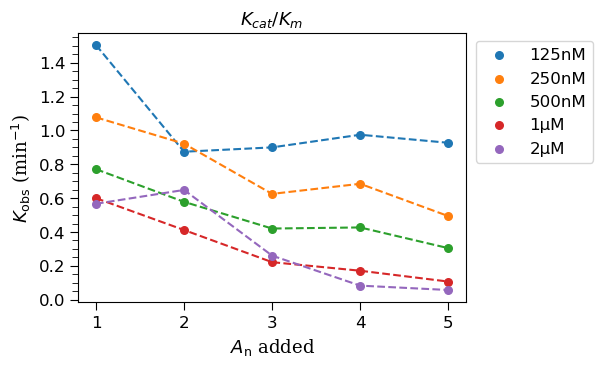

In [5]:
# Plot k values
fig, ax = plt.subplots(figsize=(5, 3.5))
for key in k_vals.keys():
    ax.scatter(np.arange(1, 6), k_vals[key][:-1], label=key, s=30)
    ax.plot(np.arange(1, 6), k_vals[key][:-1], '--')
    
ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12, length=6)
plt.gca().tick_params(axis='x', which='minor', bottom=False)
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
plt.tick_params(axis='y', which='minor', length=4)
plt.title(r'$K_{cat}/K_{m}$', family='serif', fontsize=13)

legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
plt.savefig('Kcat_Km_1_1.png', dpi=250, bbox_inches='tight')

In [11]:
# # Plot k values
# fig, ax = plt.subplots(figsize=(5, 3.5))
# for key in k_vals.keys():
#     if key in ['250nM', '500nM', '1µM']:
#         ax.scatter(np.arange(1, 7), k_vals[key], label=key, s=30)
#         plt.plot(np.arange(1, 7),k_vals[key], '--')

# ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
# ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

# plt.minorticks_on()
# plt.tick_params(axis='both', which='major', labelsize=12, length=6)
# plt.gca().tick_params(axis='x', which='minor', bottom=False)
# plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
# plt.tick_params(axis='y', which='minor', length=4)
# plt.title(r'$K_{cat}/K_{m}$', family='serif', fontsize=13)

# legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
# plt.savefig('k_vs_A_1.png', dpi=250, bbox_inches='tight')

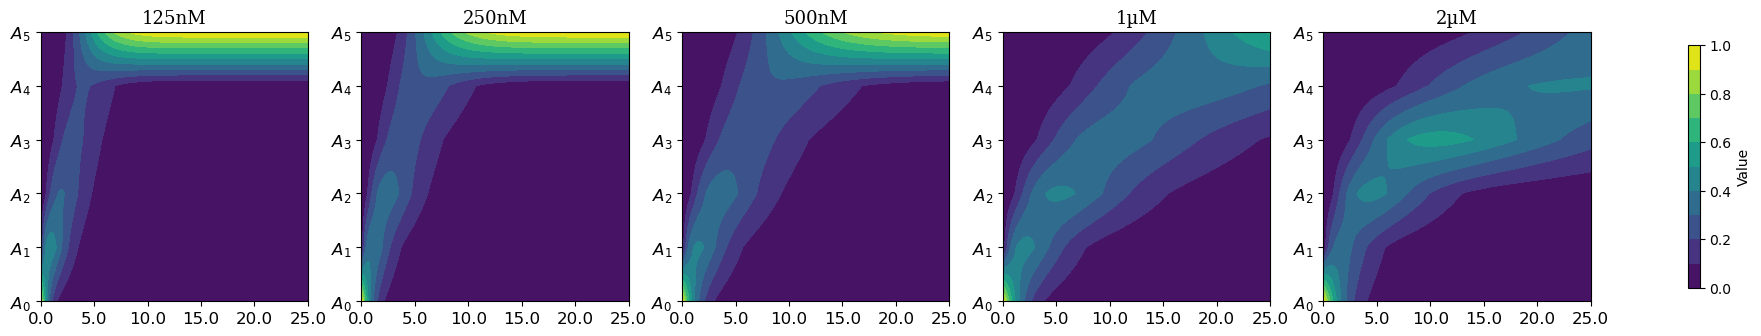

In [11]:
fig, axs = plt.subplots(ncols=5, figsize=(25,3.5), gridspec_kw={'wspace': 0.2})
for ax, key in zip(axs, contour_.keys()):
    contours = ax.contourf(contour_[key], levels=10, cmap='viridis', vmin=0, vmax=1)
    x_ = np.arange(0, contour_[key].shape[1]+1, 100)
    ax.set_xticks(x_)
    ax.set_xticklabels(x_*0.05)
    ax.set_title(key, family='serif', fontsize=13)  
    ax.set_yticks(range(6))
    ax.set_yticklabels([fr'$A_{{{n}}}$' for n in np.arange(6)])
    ax.tick_params(axis='both', labelsize=12)
    
cbar = plt.colorbar(contours, ax=axs.ravel().tolist(), shrink=0.9)
cbar.set_label('Value')
plt.savefig('Kcat_Km_2_1.png', dpi=250, bbox_inches='tight')